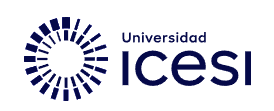

#<big><big> Fundamentos de Estadística</big></big><br><small>

**Facultad de Ingeniería / Escuela de diseño, Ingenieria y Ciencias Aplicadas**

### Certificación</small><br><small>

#### Sesión #3

# Regresión Lineal

La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente y una o más variables independientes. En su forma más simple, la regresión lineal intenta ajustar una línea recta (la ecuación de la recta) a un conjunto de datos, de manera que se minimice la suma de las diferencias al cuadrado entre los valores observados y los valores predichos por el modelo.

Se puede expresar matemáticamente como

$$ Y= β_0 + β_1X$$

## Contexto del Problema
Estás desarrollando un análisis de datos relacionado con el valor de las viviendas en una determinada región. El conjunto de datos generado incluye dos variables principales:

X (Tamaño del terreno o metros cuadrados):
Representa una característica importante de las viviendas, como el tamaño del terreno en metros cuadrados. Los valores fueron generados con una distribución normal, centrada en 150 m² con una desviación estándar de 50, y se aseguraron valores no negativos.

Y (Precio de la vivienda en miles de dólares):
Representa el precio estimado de las viviendas. Se generó siguiendo una relación lineal con la variable X, agregando un factor de ruido para reflejar variaciones del mundo real, como ubicación, estado de la vivienda y mercado

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data="/content/Regresi_n_Lineal__Datos_Generados.csv"

df=pd.read_csv(data)
df.head(10)

,X,Y
0,174.835708,321.515337
1,143.086785,283.724344
2,182.384427,309.590965
3,226.151493,394.856932
4,138.292331,250.932071
5,138.293152,252.568474
6,228.960641,387.517022
7,188.371736,323.917697
8,126.526281,240.274637
9,177.128002,307.382502


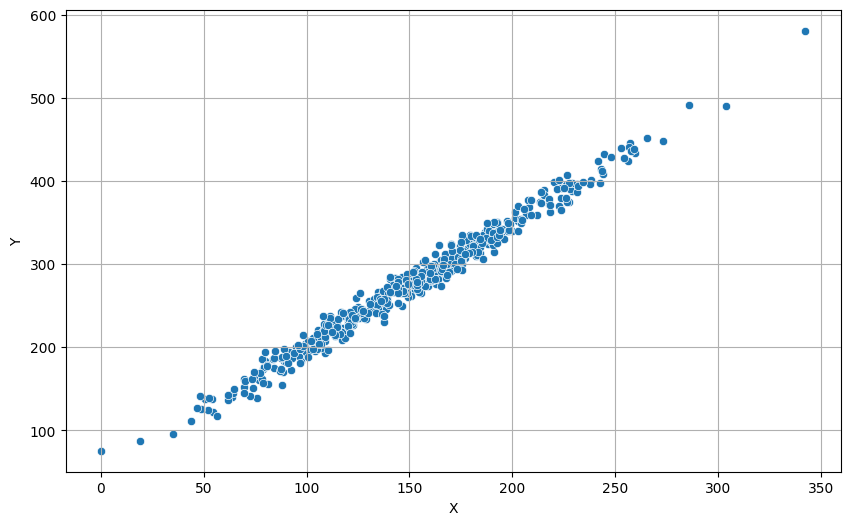

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='X',y='Y',data=df)
plt.grid()
plt.show()

In [ ]:
# Calculate the mean of X and Y
mean_x = df['X'].mean()
mean_y = df['Y'].mean()

# Calculate the variance of X and Y
variance_x = df['X'].var()
variance_y = df['Y'].var()

# Calculate the covariance between X and Y
covariance_xy = df['X'].cov(df['Y'])

print(f"Mean of X: {mean_x}")
print(f"Mean of Y: {mean_y}")
print(f"Variance of X: {variance_x}")
print(f"Variance of Y: {variance_y}")
print(f"Covariance between X and Y: {covariance_xy}")

Mean of X: 150.36602646343928
Mean of Y: 275.86730086571896
Variance of X: 2399.58356630483
Variance of Y: 5387.616882965405
Covariance between X and Y: 3563.677351924722


# Correlación Pearson

$ρ=\frac{3563}{\sqrt{2399 x 5378}}$

Resultado $ρ=0.95$

# Interpretación de Resultados

Media de X:
La media del tamaño del terreno es 150.37 m², lo cual está muy cerca del valor central esperado de 150 m². Esto confirma que la mayoría de los terrenos tienen un tamaño cercano al valor promedio.

Media de Y:
La media del precio de las viviendas es $275,867, lo que indica que en promedio las viviendas tienen este valor estimado en miles de dólares. Este valor refleja la tendencia general del mercado para terrenos de este tamaño promedio.

Varianza de X:
La varianza del tamaño de los terrenos es 2399.58, lo que indica una dispersión moderada. Esto sugiere que, aunque la mayoría de los terrenos se concentran alrededor de la media de 150 m², hay terrenos que varían significativamente en tamaño.

Varianza de Y:
La varianza del precio de las viviendas es 5387.62, lo que muestra una mayor dispersión en los precios. Esto refleja cómo los factores adicionales (además del tamaño del terreno) como la ubicación, calidad y estado de la propiedad afectan significativamente los precios.

Covarianza entre X e Y:
La covarianza entre X (tamaño del terreno) e Y (precio de la vivienda) es 3563.68. Esto indica una relación positiva fuerte entre ambas variables: **a medida que aumenta el tamaño del terreno, el precio de la vivienda también tiende a aumentar**

## Modelo de Regresión

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las variables independientes (X) y dependientes (Y)

X=df[['X']]
Y=df['Y']
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, Y)

# Obtener los coeficientes del modelo
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]

print(f"Intercepto: {intercepto}")
print(f"Pendiente: {pendiente}")

# Hacer predicciones con el modelo
Y_pred = modelo.predict(X)

# Evaluar el modelo
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Mostrar las primeras predicciones
print("Primeras 5 predicciones:")
print(Y_pred[:5])


Intercepto: 52.5552184980904
Pendiente: 1.4851232530369867
Error cuadrático medio (MSE): 94.92654773812986
Coeficiente de determinación (R²): 0.9823452960062041
Primeras 5 predicciones:
[312.20779339 265.05673002 323.41857189 388.41805919 257.93637537]


## Modelo de Reegresión

$$Y=52.55 +1.48X$$

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


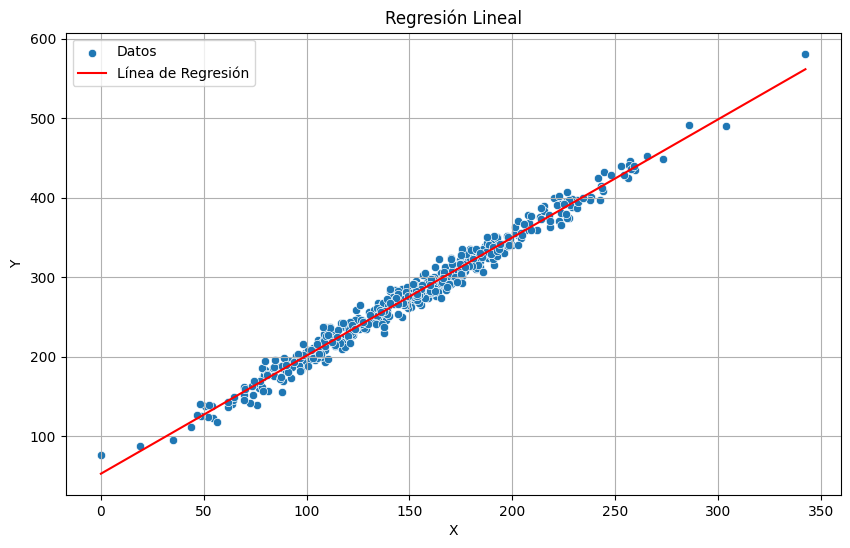

In [ ]:
#Predecir los valores de Y para dibujar la línea de regresión
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Rango de valores para la línea
Y_pred = modelo.predict(X_range)

# Gráfica de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df, label='Datos')
plt.plot(X_range, Y_pred, color='red', label='Línea de Regresión')
plt.grid()
plt.legend()
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Residuales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


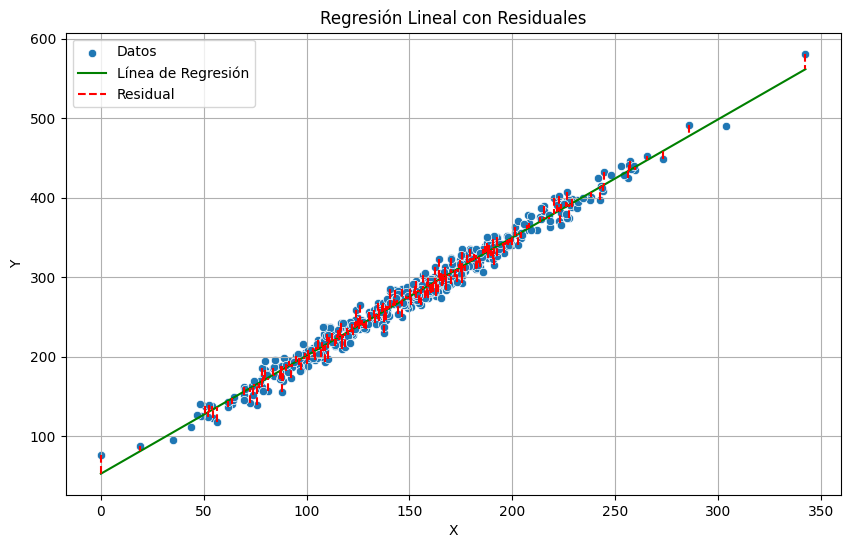

In [ ]:
# Predecir los valores de Y para dibujar la línea de regresión
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Rango de valores para la línea
Y_pred_line = modelo.predict(X_range)  # Predicción para la línea de regresión

# Predicciones sobre los datos originales
Y_pred_actual = modelo.predict(X)

# Gráfica de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df, label='Datos')
plt.plot(X_range, Y_pred_line, color='green', label='Línea de Regresión')

# Dibujar los residuales para algunos puntos
for i in range(300):  # Solo mostrar residuales para los primeros 10 puntos
    plt.vlines(x=X.iloc[i], ymin=Y.iloc[i], ymax=Y_pred_actual[i], color='red', linestyle='dashed', label='Residual' if i == 0 else '')

plt.grid()
plt.legend()
plt.title('Regresión Lineal con Residuales')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
